In [1]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

/Users/philsolenthaler 1/Documents/Universität/BCS/3.Semester/Statistik/DatenbankenProjetk/Statistik-Datenbank/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:

path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")


100%|██████████| 145M/145M [00:08<00:00, 18.6MB/s] 

Extracting files...


### Lagekennzahlen (Analyse der Prevalence Rate)

In [17]:
# Beispiel: Prevalence Rate (%)
s = ds["amt"].dropna()

print("Mittelwert:", s.mean())
print("Median:", s.median())
print("Quantile (25%,50%,75%):", s.quantile([0.25,0.5,0.75]).to_dict())
print("Modus:", s.mode().tolist())
print("min, max:", s.min(), s.max())

q_low, q_high = s.quantile(0.1), s.quantile(0.9)
trimmed = s[(s >= q_low) & (s <= q_high)].mean()
print("Trimmed Mean (10%):", trimmed)

Mittelwert: 70.35103545607032
Median: 47.52
Quantile (25%,50%,75%): {0.25: 9.65, 0.5: 47.52, 0.75: 83.14}
Modus: [1.14]
min, max: 1.0 28948.9
Trimmed Mean (10%): 49.83294629123474


### Streuung

In [5]:
print("Varianz:", s.var())
print("Standardabweichung:", s.std())
iqr = s.quantile(0.75) - s.quantile(0.25)
mad = (s - s.median()).abs().median()
print("IQR:", iqr)
print("MAD:", mad)

Varianz: 25701.232223267565
Standardabweichung: 160.3160385715277
IQR: 73.49
MAD: 37.5


### Ausreisserprüfung

##### Klassisch: Z-Score

In [6]:
z = (s - s.mean()) / s.std()
outliers_z = s[abs(z) > 3]
print("Anzahl Ausreißer (Z-Score >3):", len(outliers_z))

Anzahl Ausreißer (Z-Score >3): 12738


##### Modifizierter Z-Score

In [7]:
median = s.median()
mad = (s - median).abs().median()
mod_z = 0.6745 * (s - median) / mad
outliers_modz = s[mod_z.abs() > 3.5]
print("Anzahl Ausreißer (mod. Z-Score >3.5):", len(outliers_modz))

Anzahl Ausreißer (mod. Z-Score >3.5): 40359


### Verteilungsform (in VL3(Analyse_3.ipynb) genauer)

/Users/philsolenthaler 1/Documents/Universität/BCS/3.Semester/Statistik/DatenbankenProjetk/Statistik-Datenbank/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


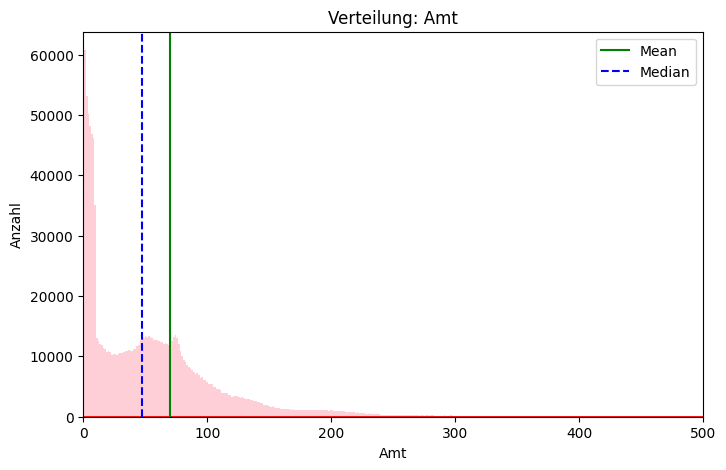

In [12]:
plt.figure(figsize=(8,5))

# Histogramm mit normalen Häufigkeiten (Counts)
sns.histplot(s, bins="fd", color="pink", edgecolor="purple", stat="count")

# KDE separat in anderer Farbe
sns.kdeplot(s, color="red", lw=2)

# Mittelwert und Median einzeichnen
plt.axvline(s.mean(), color="green", linestyle="-", label="Mean")
plt.axvline(s.median(), color="blue", linestyle="--", label="Median")

plt.title("Verteilung: Amt")
plt.xlabel("Amt")
plt.ylabel("Anzahl")
plt.xlim(0, 500) # Begrenzung des x-Achsenbereichs
plt.legend()
plt.show()

In [ ]:


ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")  # sicherstellen, dass es Datumswerte sind
ds["age"] = (pd.Timestamp("now") - ds["dob"]).dt.days / 365.25  # Alter in Jahren

suitable_cols = ["city_pop", "age"]

for col in suitable_cols:
    print("\n---", col, "---")
    s = ds[col].dropna()
    print("Mean:", round(s.mean(), 2))
    print("Median:", round(s.median(), 2))
    print("Std:", round(s.std(), 2))



--- city_pop ---
Mean: 88824.44
Median: 2456.0
Std: 301956.36

--- age ---
Mean: 52.01
Median: 49.85
Std: 17.39


In [16]:
print(ds.groupby("gender")["age"].agg(["mean", "median", "std", "count"]).round(2))


         mean  median    std   count
gender                              
F       51.91   49.76  17.49  709863
M       52.12   50.25  17.27  586812
